In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 
import os

In [2]:
os.chdir('//Users//arpitgautam//Desktop//GL Project//LI_BFSI_01 - Life Insurance Sales//LI_BFSI_01 - Life Insurance Sales')

In [3]:
df = pd.read_excel('Sales.xlsx',sheet_name=1)

In [5]:
df.head().T

,0,1,2,3,4
CustID,7000000,7000001,7000002,7000003,7000004
AgentBonus,4409,2214,4273,1791,2955
Age,22,11,26,11,6
CustTenure,4,2,4,NaN,NaN
Channel,Agent,Third Party Partner,Agent,Third Party Partner,Agent
Occupation,Salaried,Salaried,Free Lancer,Salaried,Small Business
EducationField,Graduate,Graduate,Post Graduate,Graduate,UG
Gender,Female,Male,Male,Fe male,Male
ExistingProdType,3,4,4,3,3
Designation,Manager,Manager,Exe,Executive,Executive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [6]:
# From the above analysis we can state:
# 1. Although we need to calculate Agent Bonus but the dataset is a customer centric dataset.
# 2. There are a total of 20 columns namely CustID, AgentBonus, Age, CustTenure, Channel, Occupation, EducationField,
#    Gender, ExistingProdType, Designation, NumberOfPolicy, MaritalStatus, MonthlyIncome, Complaint,
#    ExistingPolicyTenure, SumAssured, Zone, PaymentMethod, LastMonthCalls, CustCareScore
#  3. Some column variables have missing values namely Age, CustTenure, NumberOfPolicy, MonthlyIncome, 
#    ExistingPolicyTenure, SumAssured, CustCareScore.
#  4 . There are a total of 4520 records in the dataset
#

In [7]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [8]:
df1 = pd.DataFrame();
for col in df.columns:
    if df[col].dtype == 'object':
        print(col,': ',df[col].unique())

Channel :  ['Agent' 'Third Party Partner' 'Online']
Occupation :  ['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']
EducationField :  ['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']
Gender :  ['Female' 'Male' 'Fe male']
Designation :  ['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']
MaritalStatus :  ['Single' 'Divorced' 'Unmarried' 'Married']
Zone :  ['North' 'West' 'East' 'South']
PaymentMethod :  ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


In [9]:
# We can clearly see there are some data quality issues 
# 1. In Occupation 'Laarge Business' and 'Large Business' seems to be same.
# 2. In EducationField we should consider 'UG' and 'Under Graduate' as same.
# 3. In Gender column variable 'Fe male' should be replace with 'Female'.
# 4. In Designation 'Exe' can be replaced with 'Executive'.
# 5. In EducationField we can replace 'Engineer' with 'Graduate' and 'MBA' with 'Post Graduate'. 

# Cleaning the data

In [10]:
df.Occupation.replace('Laarge Business','Large Business',inplace=True)

In [11]:
df.EducationField.replace('UG','Under Graduate',inplace=True)

In [12]:
df.EducationField.replace('Engineer','Graduate',inplace=True)

In [13]:
df.EducationField.replace('MBA','Post Graduate',inplace=True)

In [14]:
df.Gender.replace('Fe male','Female',inplace=True)

In [15]:
df.Designation.replace('Exe','Executive',inplace=True)

In [16]:
df.Designation.replace('AVP','Assistant Vice President',inplace=True)

In [17]:
df.Designation.replace('VP','Vice President',inplace=True)

In [18]:
df.MaritalStatus.replace('Single','Unmarried',inplace=True)

In [19]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Unmarried,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [20]:
df1 = pd.DataFrame();
for col in df.columns:
    if df[col].dtype == 'object':
        print(col,': ',df[col].unique())

Channel :  ['Agent' 'Third Party Partner' 'Online']
Occupation :  ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
EducationField :  ['Graduate' 'Post Graduate' 'Under Graduate' 'Diploma']
Gender :  ['Female' 'Male']
Designation :  ['Manager' 'Executive' 'Vice President' 'Assistant Vice President'
 'Senior Manager']
MaritalStatus :  ['Unmarried' 'Divorced' 'Married']
Zone :  ['North' 'West' 'East' 'South']
PaymentMethod :  ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


# Univariate Analysis

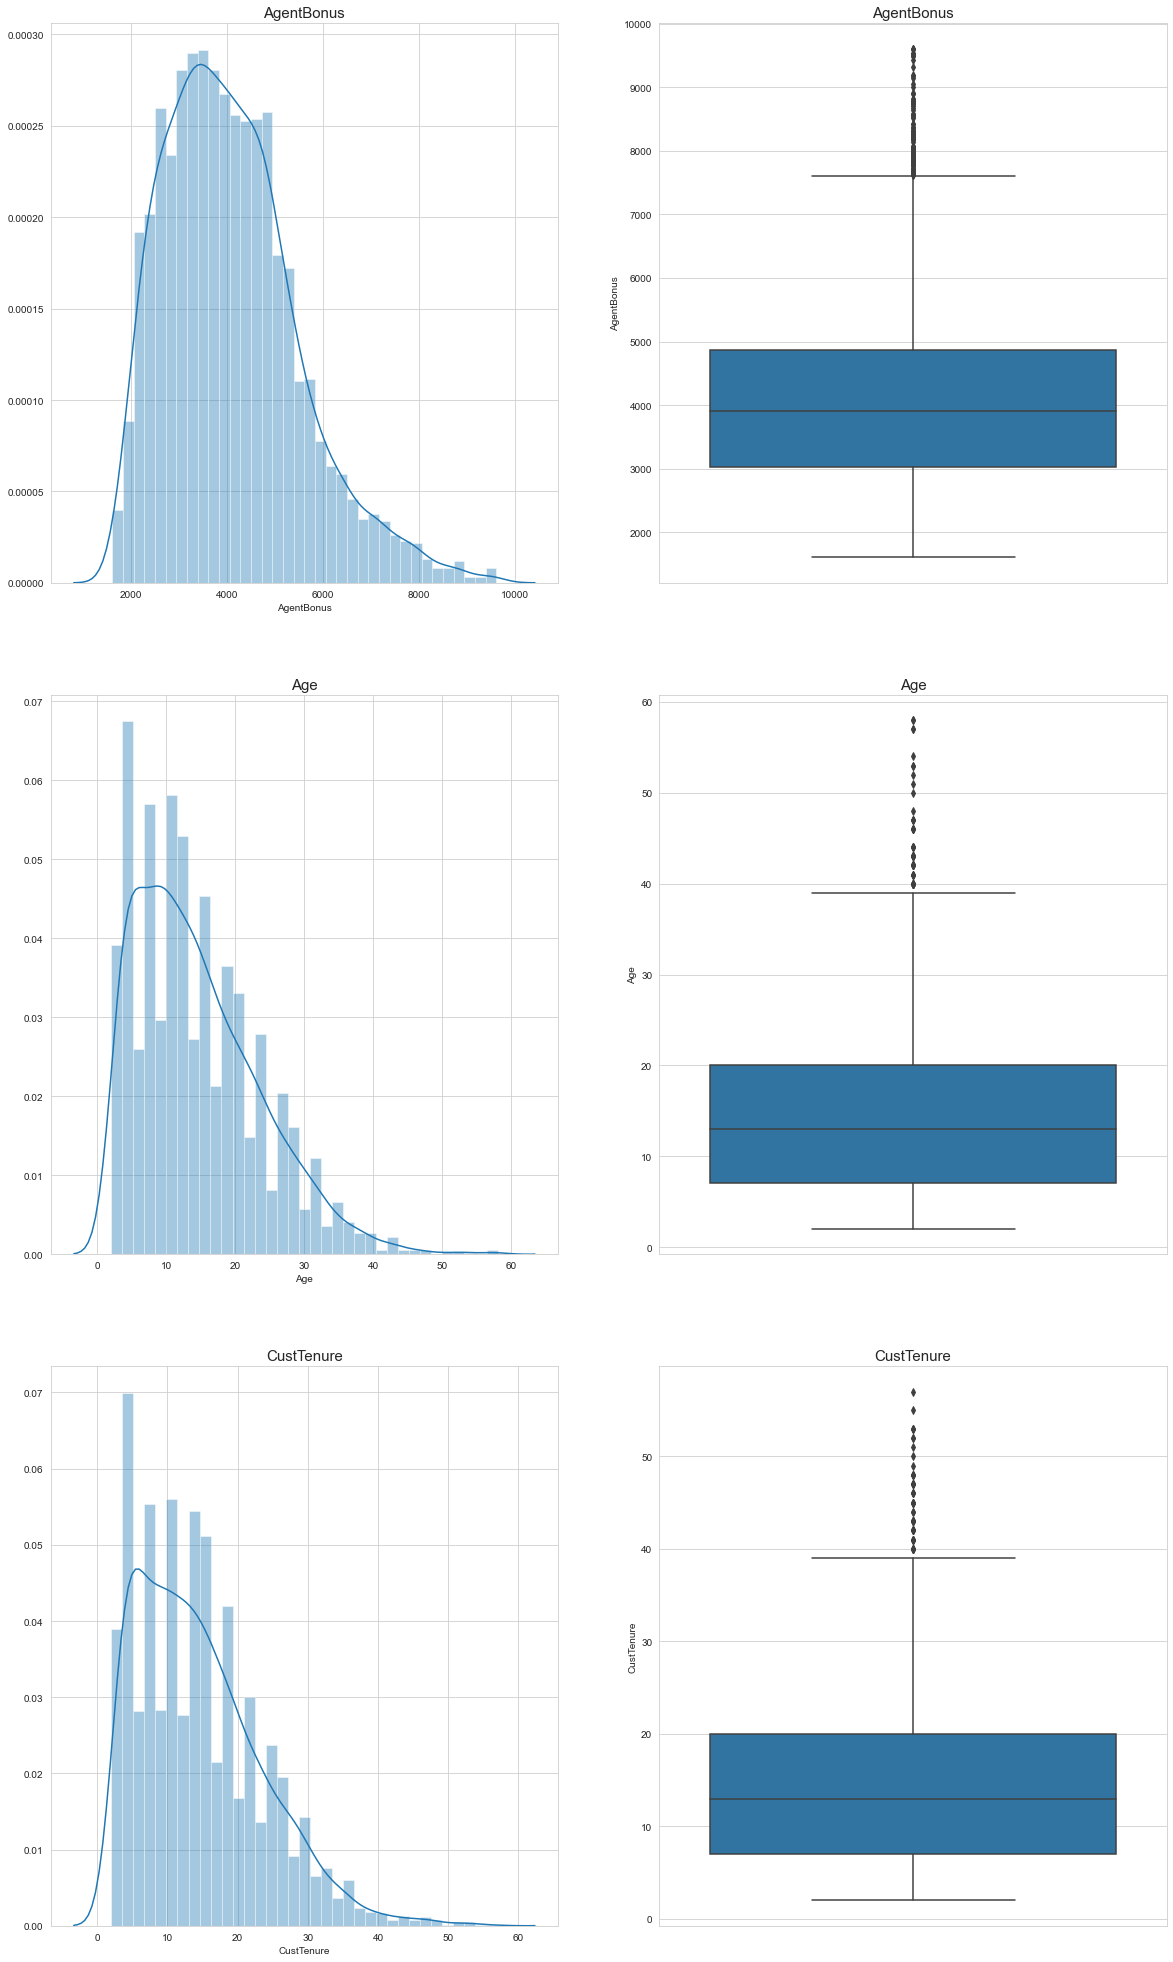

In [21]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 35)

uplot = sns.distplot(df['AgentBonus'] , ax=axes[0][0])
uplot.set_title("AgentBonus",fontsize=15)
uplot = sns.boxplot(df['AgentBonus'] , orient = "v" , ax=axes[0][1])
uplot.set_title("AgentBonus",fontsize=15)

uplot = sns.distplot(df['Age'] , ax=axes[1][0])
uplot.set_title("Age",fontsize=15)
uplot = sns.boxplot(df['Age'] , orient = "v" , ax=axes[1][1])
uplot.set_title("Age",fontsize=15)

uplot = sns.distplot(df['CustTenure'] , ax=axes[2][0])
uplot.set_title("CustTenure",fontsize=15)
uplot = sns.boxplot(df['CustTenure'] , orient = "v" , ax=axes[2][1])
uplot.set_title("CustTenure",fontsize=15)



plt.show()

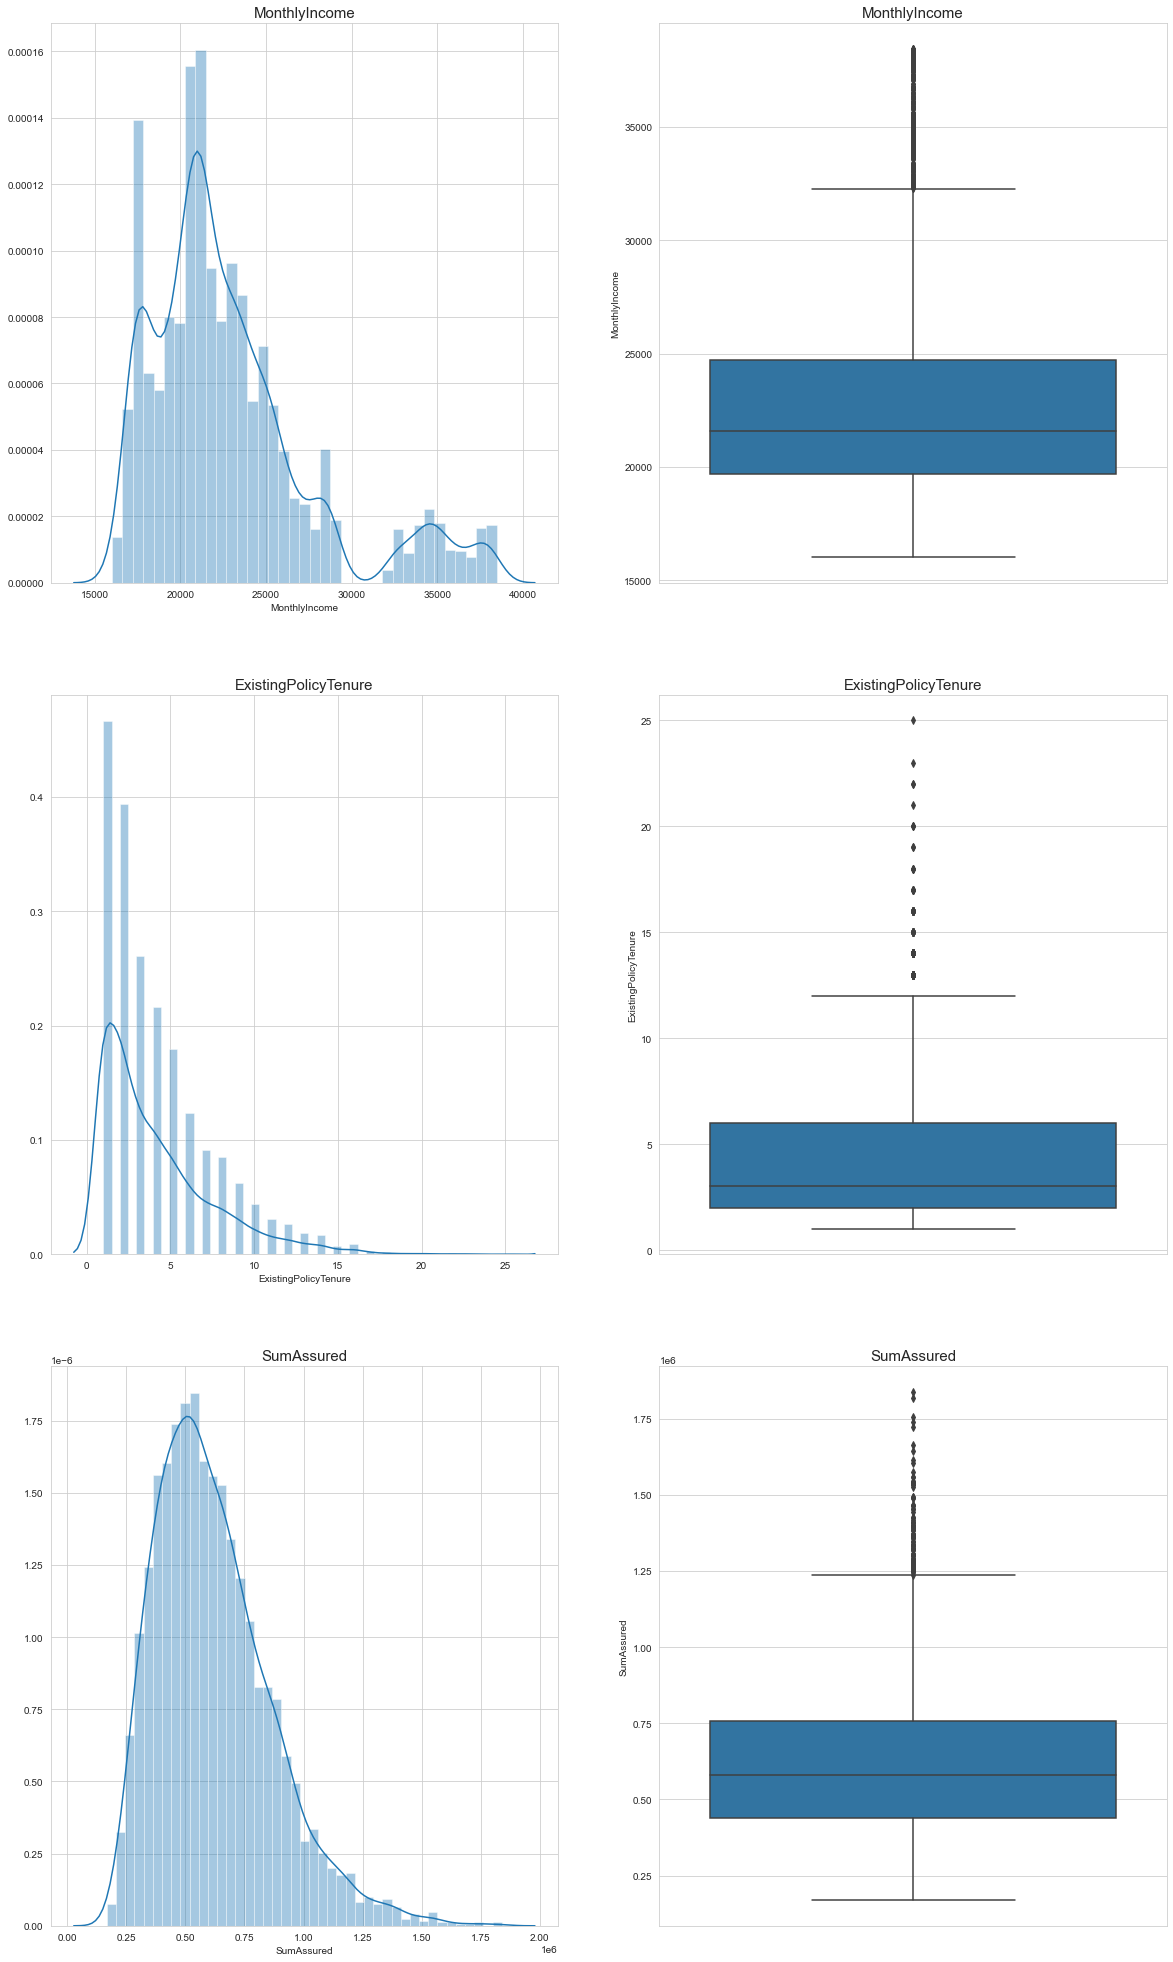

In [22]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 35)

uplot = sns.distplot(df['MonthlyIncome'] , ax=axes[0][0])
uplot.set_title("MonthlyIncome",fontsize=15)
uplot = sns.boxplot(df['MonthlyIncome'] , orient = "v" , ax=axes[0][1])
uplot.set_title("MonthlyIncome",fontsize=15)

uplot = sns.distplot(df['ExistingPolicyTenure'] , ax=axes[1][0])
uplot.set_title("ExistingPolicyTenure",fontsize=15)
uplot = sns.boxplot(df['ExistingPolicyTenure'] , orient = "v" , ax=axes[1][1])
uplot.set_title("ExistingPolicyTenure",fontsize=15)

uplot = sns.distplot(df['SumAssured'] , ax=axes[2][0])
uplot.set_title("SumAssured",fontsize=15)
uplot = sns.boxplot(df['SumAssured'] , orient = "v" , ax=axes[2][1])
uplot.set_title("SumAssured",fontsize=15)


plt.show()

([<matplotlib.patches.Wedge at 0x7fd5feac0790>,
 [Text(-0.3224211494708721, 1.0516865513896627, 'Males'),
  Text(0.32242114947087225, -1.0516865513896627, 'Females')],
 [Text(-0.1758660815295666, 0.5736472098489069, '59.5%'),
  Text(0.17586608152956665, -0.5736472098489068, '40.5%')])

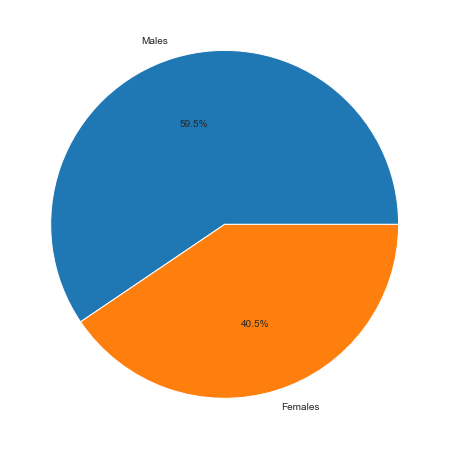

In [23]:
fig=plt.figure(figsize=(10, 8))
plt.pie(df['Gender'].value_counts(normalize=True), labels=['Males','Females'], autopct='%1.1f%%')

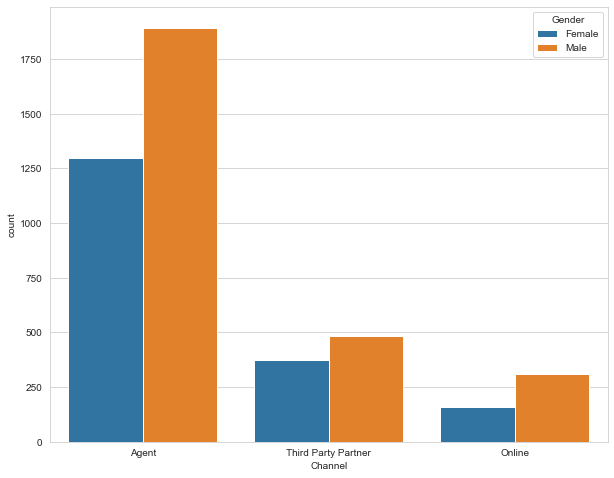

In [24]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='Channel',hue='Gender', data=df)

In [25]:
df[df.Occupation == 'Free Lancer']

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
2262,7002262,3698,7.0,11.0,Agent,Free Lancer,Post Graduate,Male,5,Executive,4.0,Unmarried,20547.0,1,4.0,558467.0,North,Yearly,1,3.0


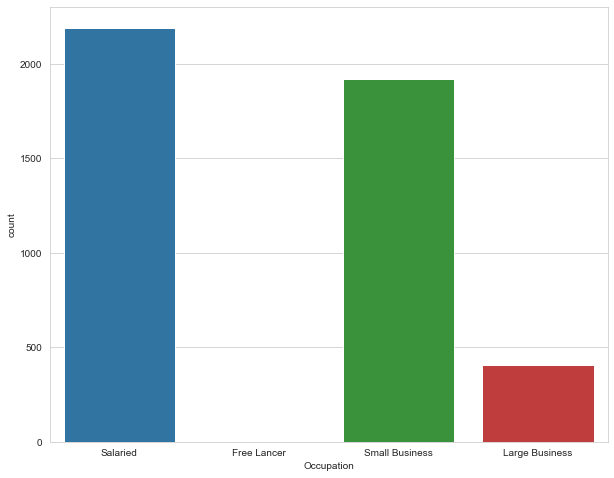

In [26]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='Occupation', data=df)

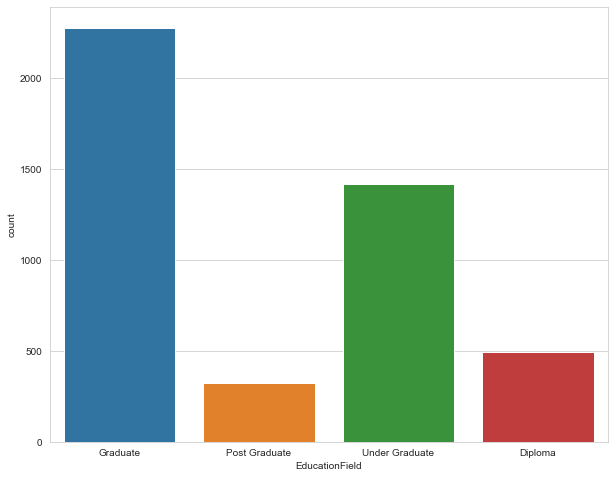

In [27]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='EducationField', data=df)

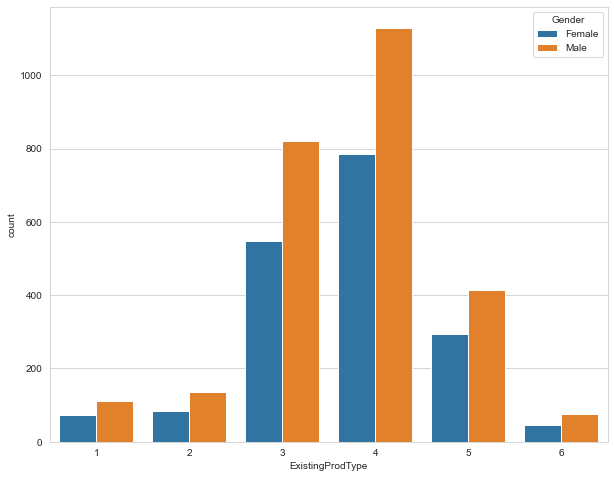

In [28]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='ExistingProdType',hue='Gender', data=df)

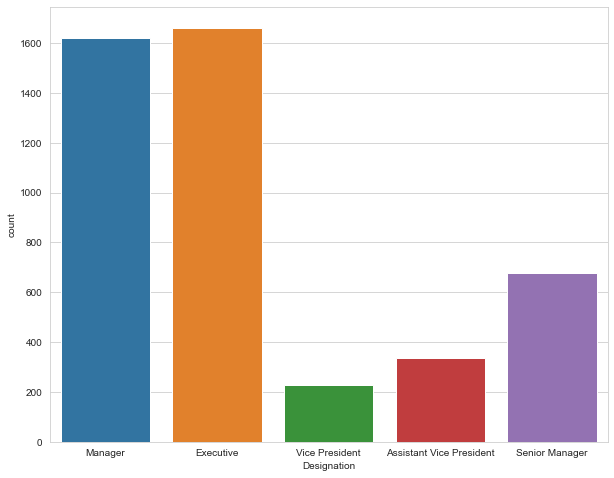

In [29]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='Designation', data=df)

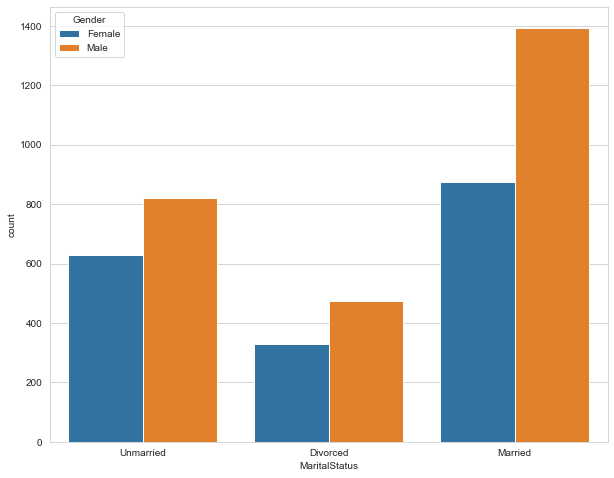

In [30]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='MaritalStatus', hue='Gender', data=df)

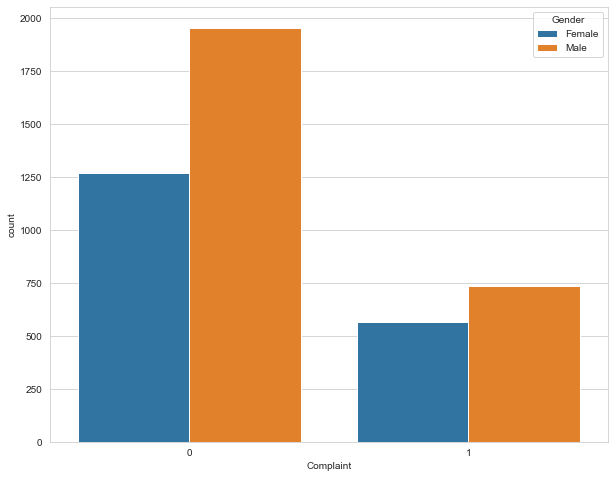

In [31]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='Complaint',hue='Gender', data=df)

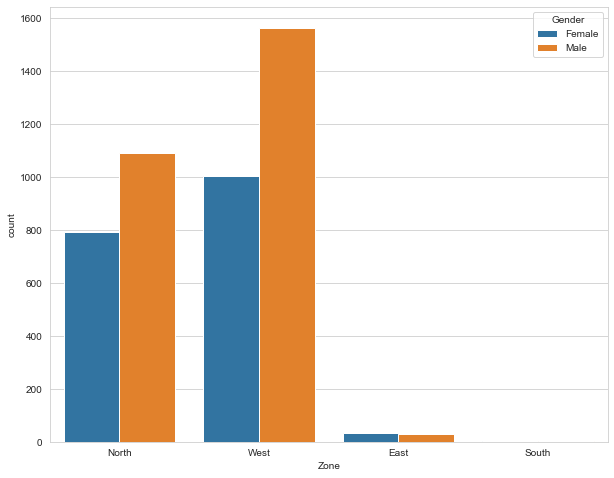

In [32]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='Zone', hue='Gender', data=df)

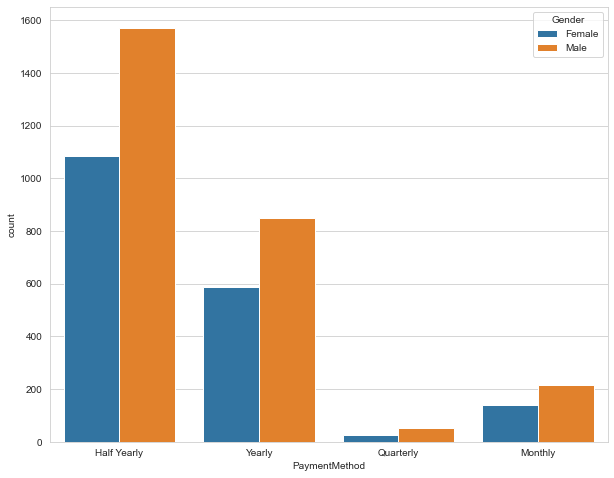

In [33]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod',hue='Gender', data=df)

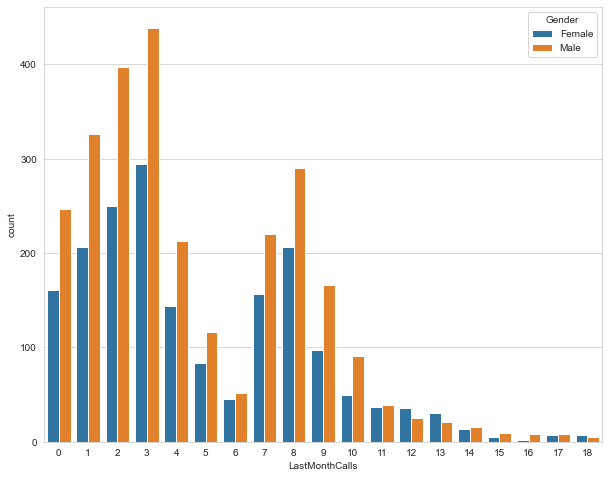

In [34]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='LastMonthCalls',hue='Gender', data=df)

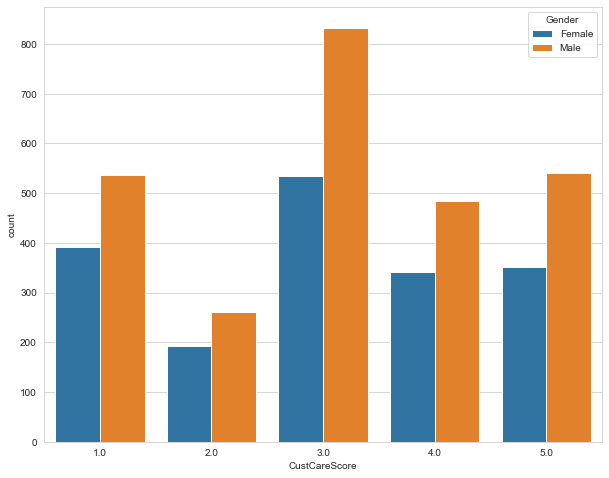

In [35]:
fig=plt.figure(figsize=(10, 8))
sns.countplot(x='CustCareScore',hue='Gender', data=df)

# Bivariate Analysis

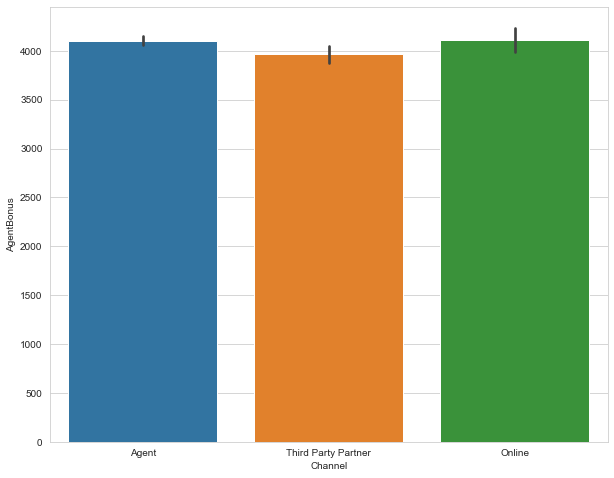

In [36]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='Channel',y='AgentBonus', data=df)

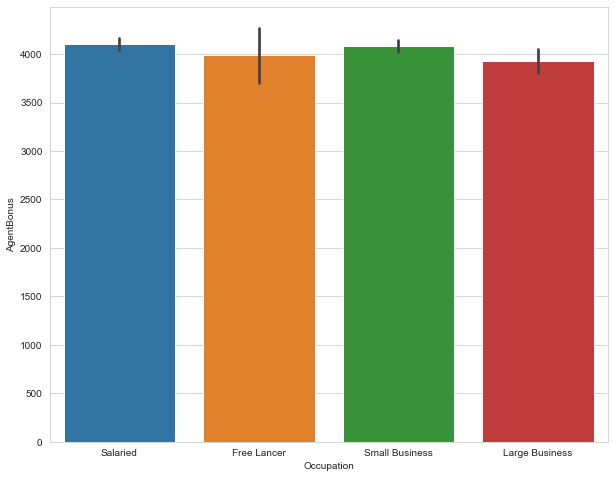

In [37]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='Occupation',y='AgentBonus', data=df)

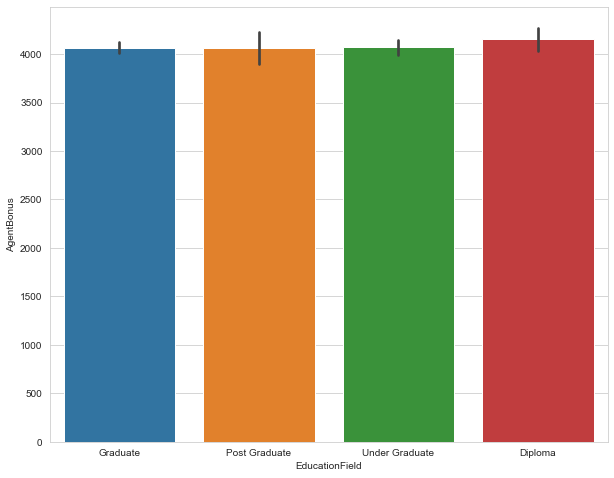

In [38]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='EducationField',y='AgentBonus', data=df)

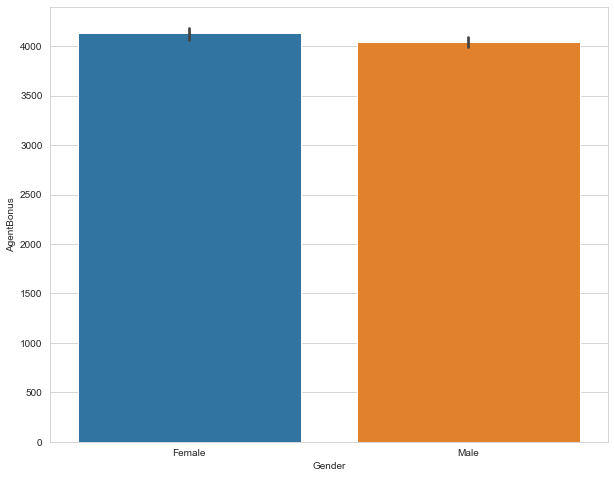

In [39]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='Gender',y='AgentBonus', data=df)

In [40]:
df[['ExistingProdType', 'AgentBonus']].groupby('ExistingProdType').mean()

,AgentBonus
ExistingProdType,
1,3777.743169
2,4190.855204
3,3815.368152
4,4170.494259
5,4317.295198
6,4420.910569


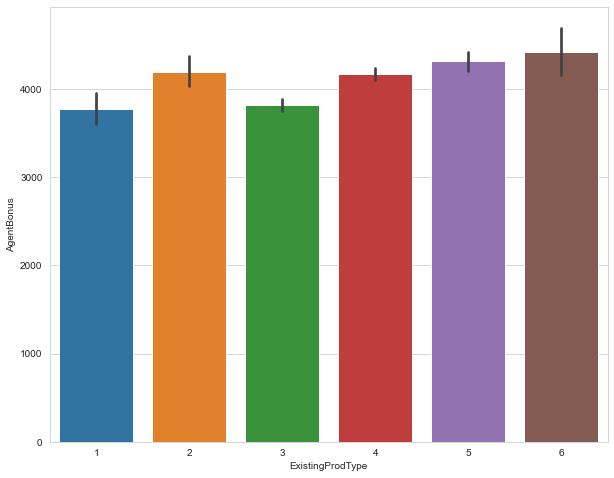

In [41]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='ExistingProdType',y='AgentBonus', data=df)

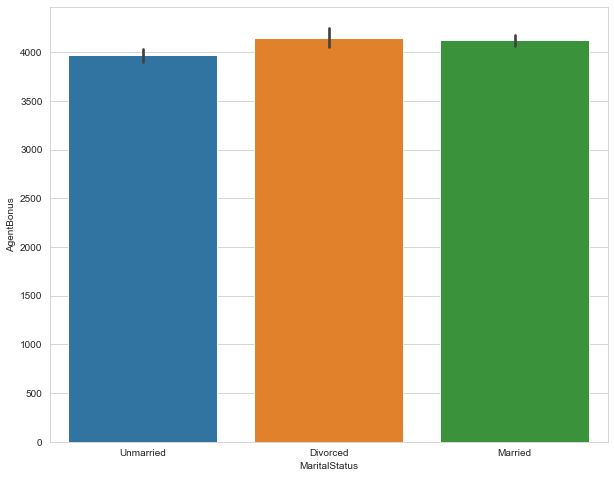

In [42]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='MaritalStatus',y='AgentBonus', data=df)

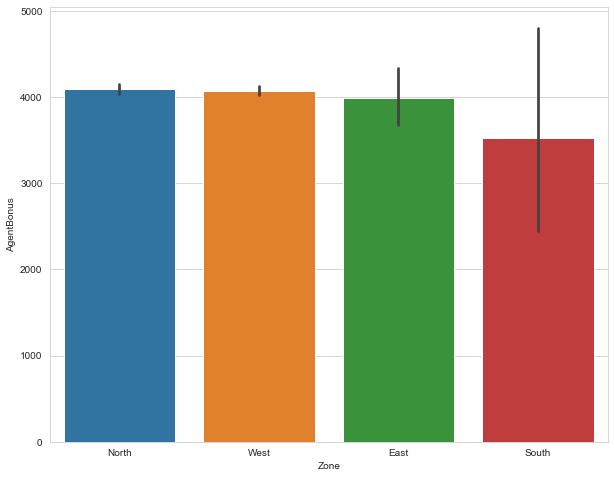

In [43]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='Zone',y='AgentBonus', data=df)

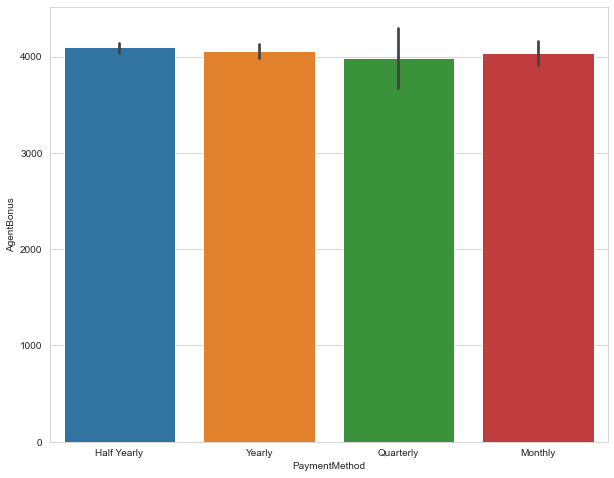

In [44]:
fig=plt.figure(figsize=(10, 8))
sns.barplot(x='PaymentMethod',y='AgentBonus', data=df)

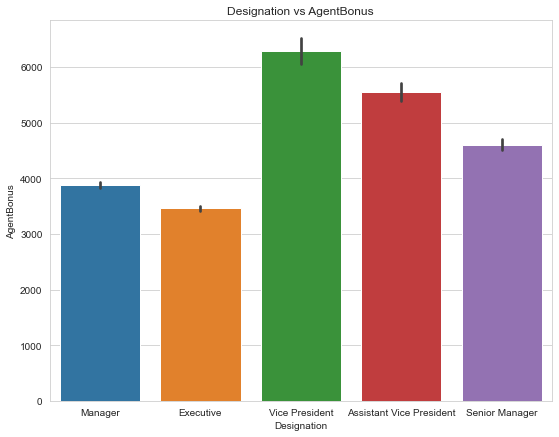

In [45]:
fig=plt.figure(figsize=(9, 7))
plt.title('Designation vs AgentBonus')
sns.barplot(x='Designation',y='AgentBonus', data=df)

In [46]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Unmarried,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


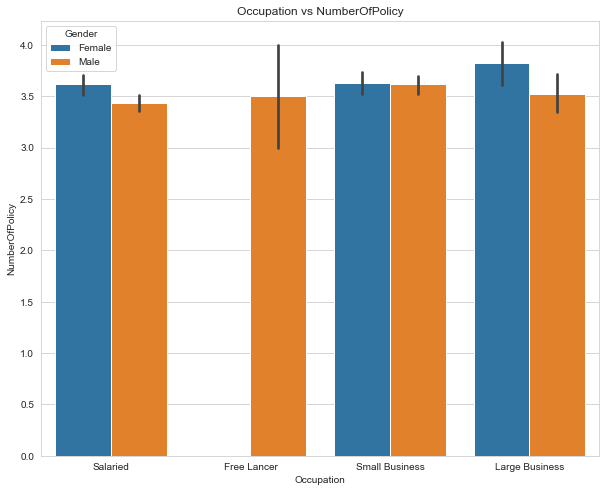

In [47]:
fig=plt.figure(figsize=(10, 8))
plt.title('Occupation vs NumberOfPolicy')
sns.barplot(x='Occupation',y='NumberOfPolicy',hue='Gender', data=df)

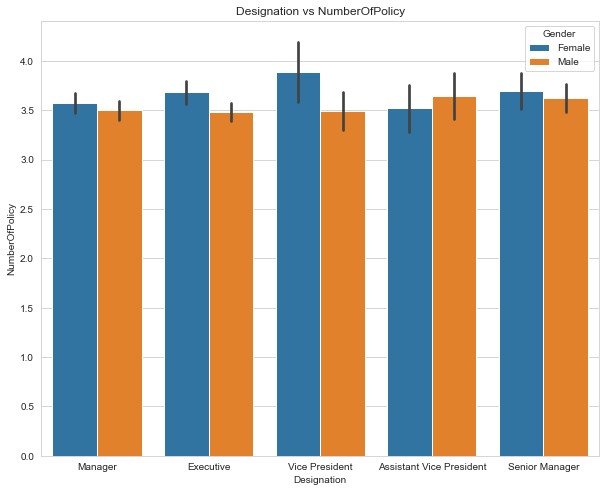

In [48]:
fig=plt.figure(figsize=(10, 8))
plt.title('Designation vs NumberOfPolicy')
sns.barplot(x='Designation',y='NumberOfPolicy',hue='Gender', data=df)

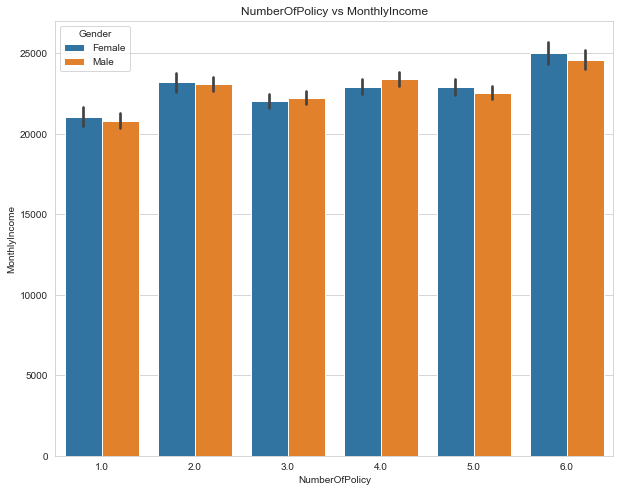

In [49]:
fig=plt.figure(figsize=(10, 8))
plt.title('NumberOfPolicy vs MonthlyIncome')
sns.barplot(x='NumberOfPolicy',y='MonthlyIncome',hue='Gender', data=df)

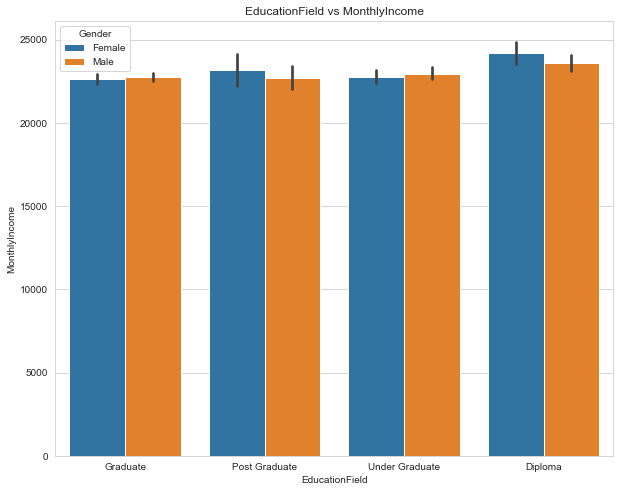

In [50]:
fig=plt.figure(figsize=(10, 8))
plt.title('EducationField vs MonthlyIncome')
sns.barplot(x='EducationField',y='MonthlyIncome',hue='Gender', data=df)

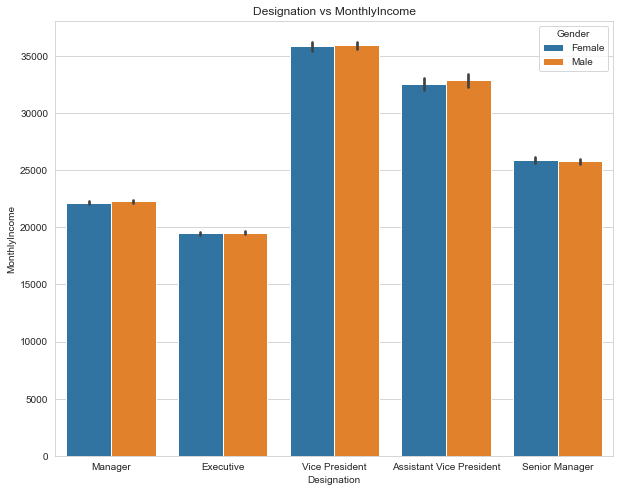

In [51]:
fig=plt.figure(figsize=(10, 8))
plt.title('Designation vs MonthlyIncome')
sns.barplot(x='Designation',y='MonthlyIncome',hue='Gender', data=df)

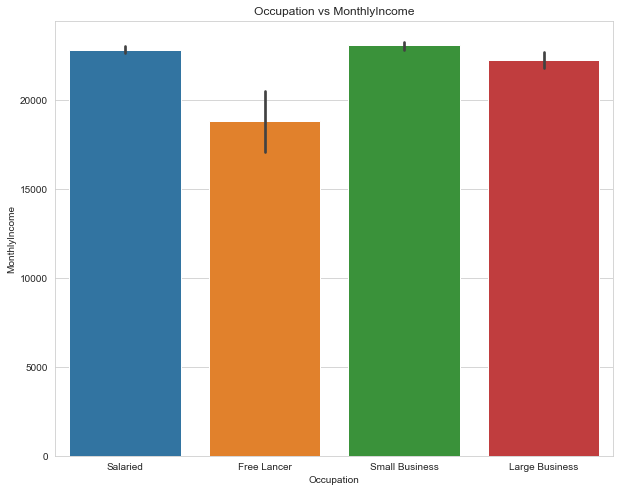

In [52]:
fig=plt.figure(figsize=(10, 8))
plt.title('Occupation vs MonthlyIncome')
sns.barplot(x='Occupation',y='MonthlyIncome', data=df)

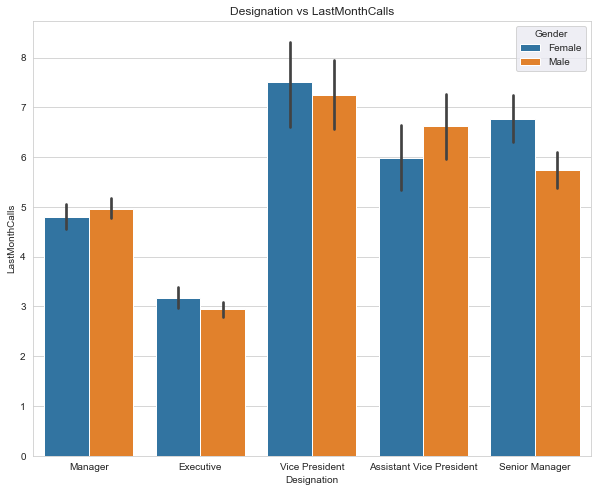

In [53]:
fig=plt.figure(figsize=(10, 8))
plt.title('Designation vs LastMonthCalls')
with sns.axes_style("darkgrid"):
    sns.barplot(x='Designation',y='LastMonthCalls',hue='Gender', data=df)

# Multivariate Analysis

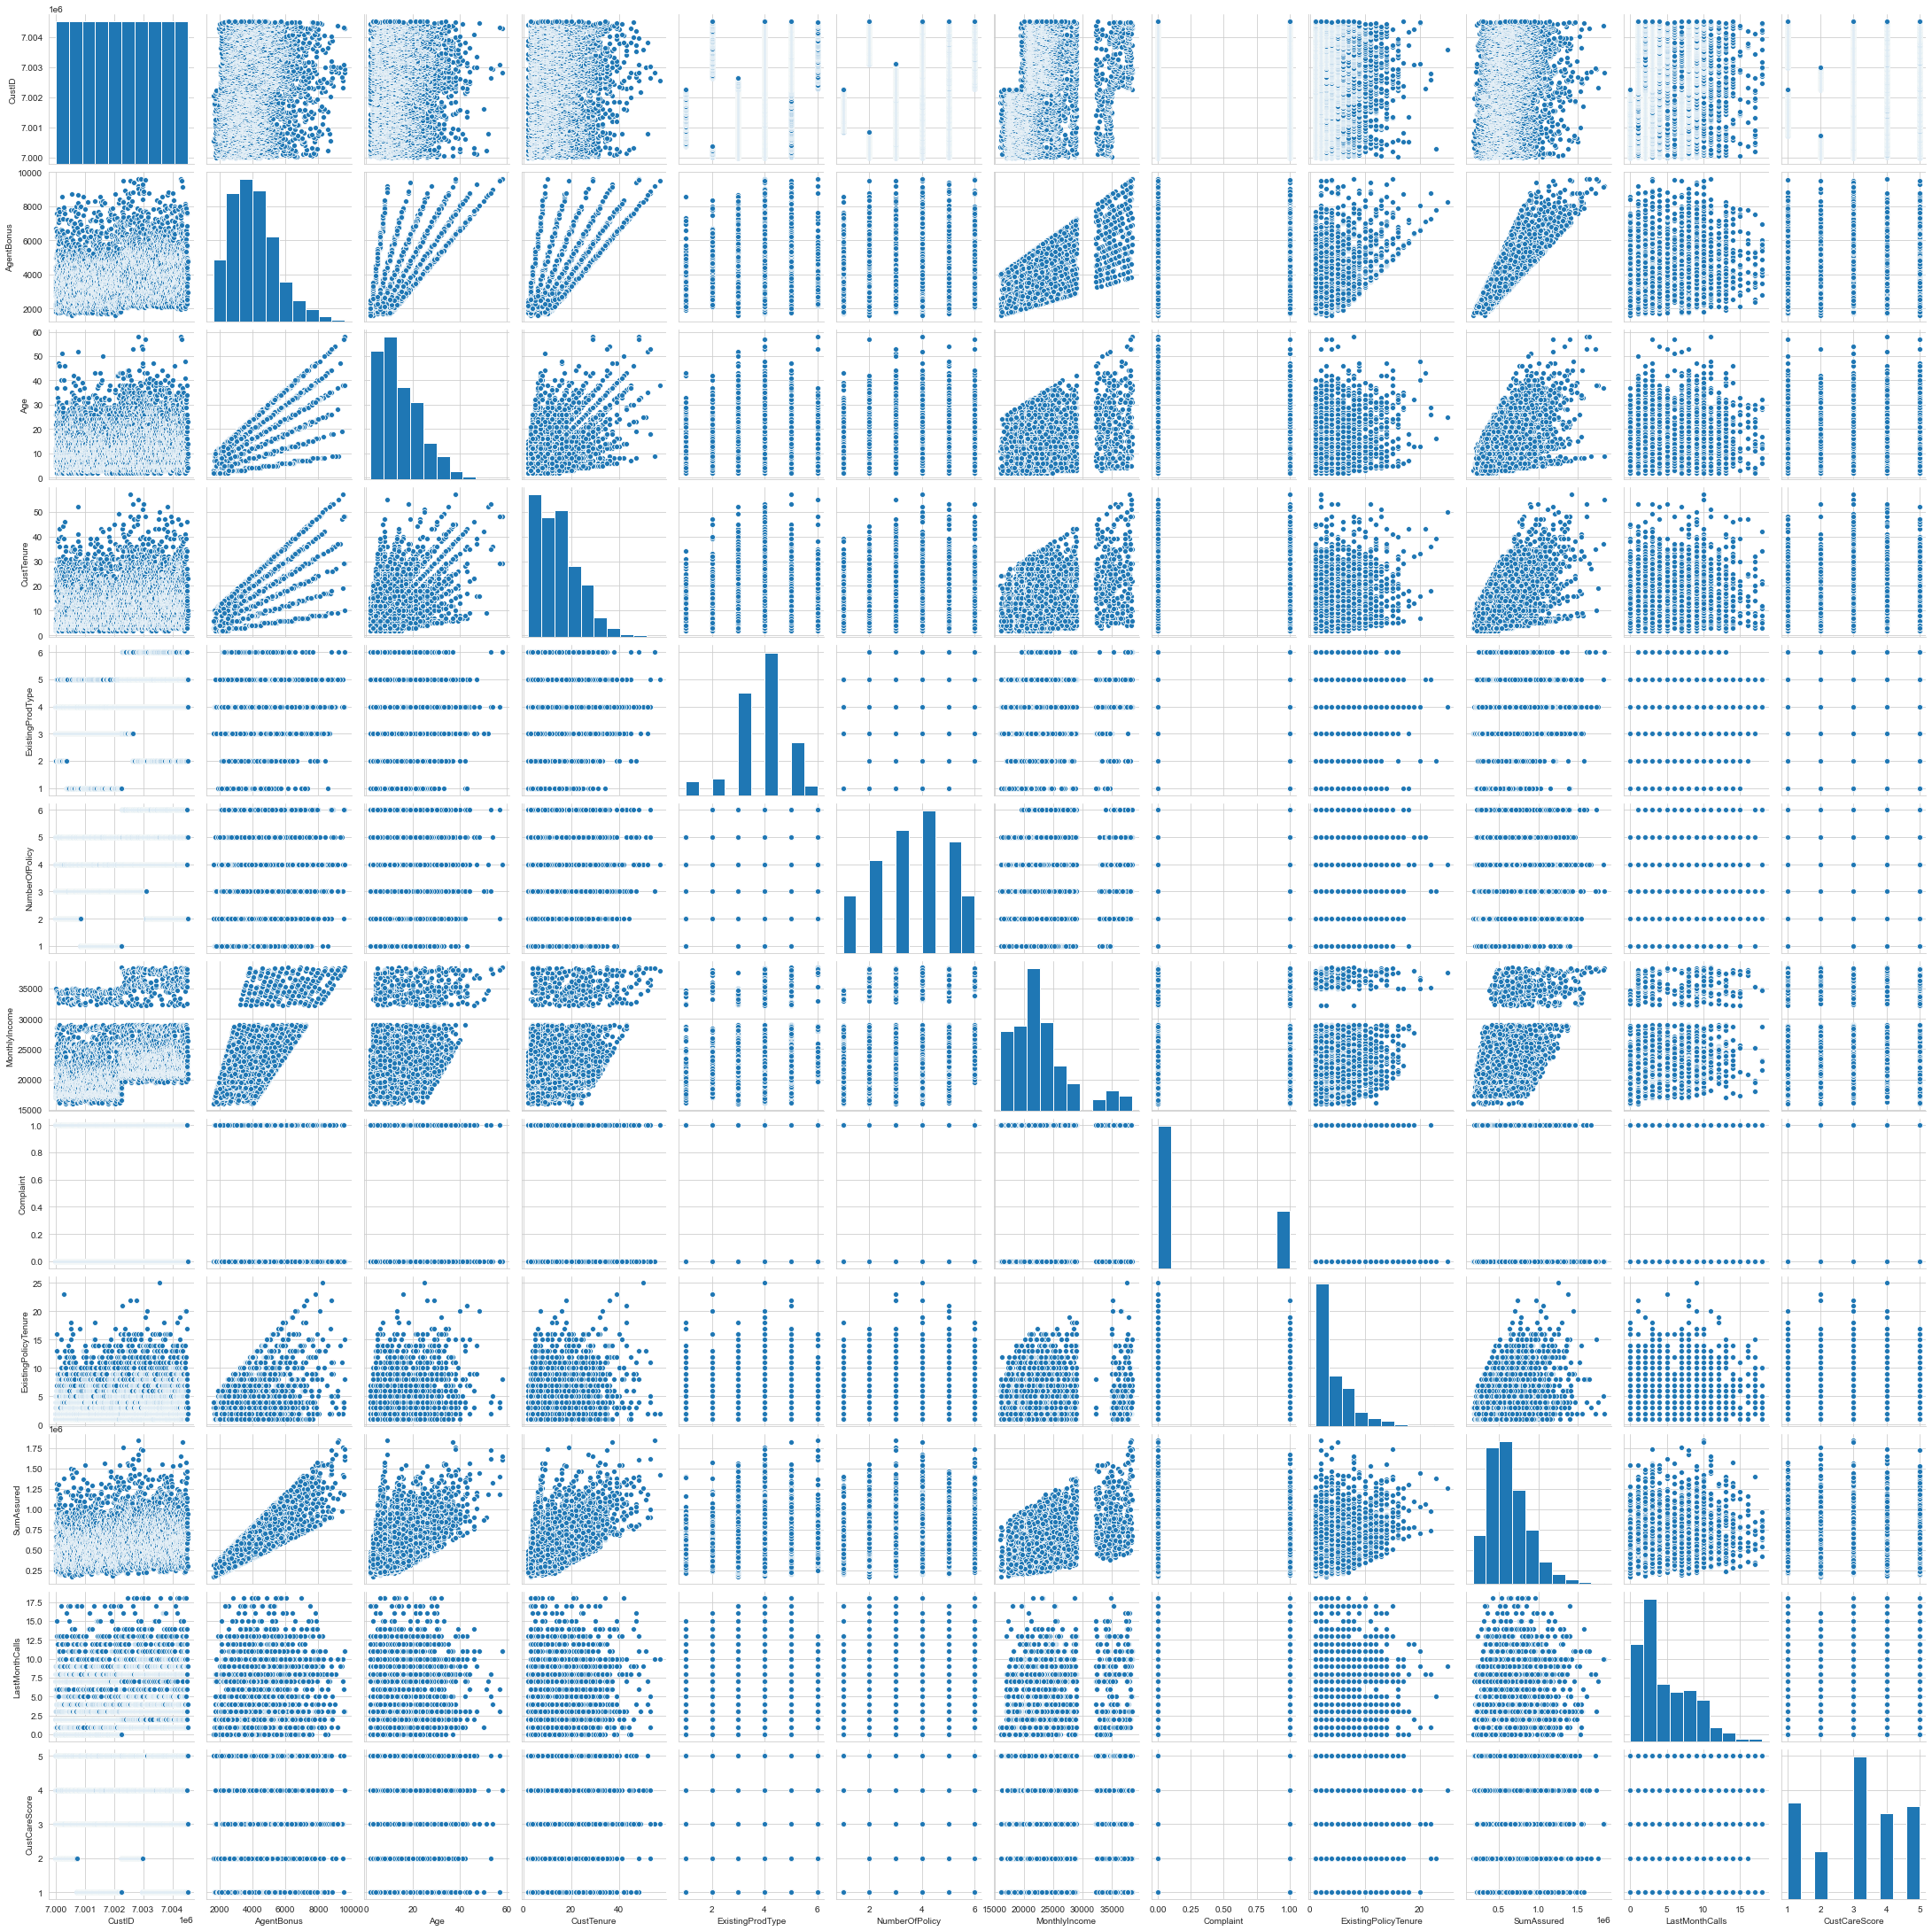

In [54]:
sns.pairplot(data=df)

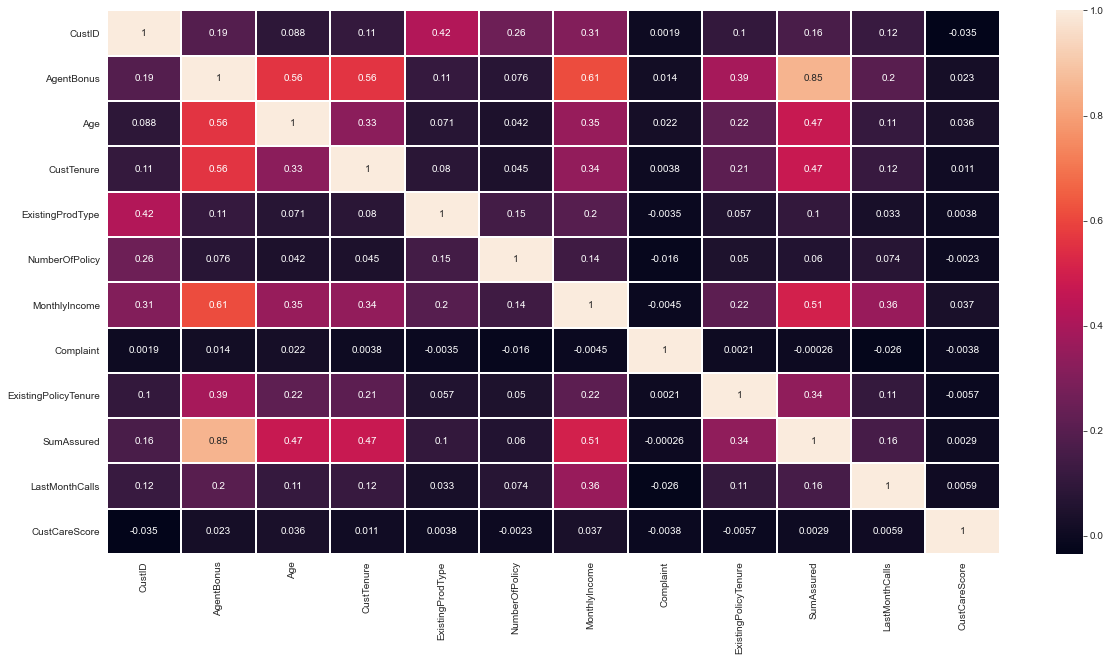

In [55]:
fix,ax = plt.subplots(figsize=(20,10))
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True, fmt='.2g',linewidths=1)

# Removal of unwanted variables

In [56]:
# Customer ID is something that is not usefull for model building we can get rid of it

In [57]:
df = df.drop(['CustID'],axis=1)

# Missing Value Treatement

In [58]:
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [59]:
# As we can see from table above
    # Age has 269 missing values
    # CustTenure has 226 missing values
    # NumberOfPolicy has 45 missing values
    # MonthlyIncome has 236 missing values
    # ExistingPolicyTenure has 184 missing values
    # SumAssured has 154 missing values
    # CustCareScore has 54 missing values

In [60]:
# Age has outliers the best value to impute missing value is median
# CustTenure also has outliers we should impute missing values with median
# NumberOfPolicy being categorical variable we can use mode to impute missing values
# MonthlyIncome being continous variable and having ouliers median would be ideal to impute missing values
# For SumAssured and ExistingPolicyTenure also we will use median
# CustCareScore being categorical we will use mode to impute missing values

In [61]:
df.Age.fillna(df.Age.median(),inplace=True)

In [62]:
df.CustTenure.fillna(df.CustTenure.median(),inplace=True)

In [63]:
df.NumberOfPolicy.fillna(df.NumberOfPolicy.mode()[0],inplace=True)

In [64]:
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [65]:
df.ExistingPolicyTenure.fillna(df.ExistingPolicyTenure.median(),inplace=True)

In [66]:
df.SumAssured.fillna(df.SumAssured.median(),inplace=True)

In [67]:
df.CustCareScore.fillna(df.CustCareScore.median(),inplace=True)

In [68]:
df.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

# Outlier Treatment

In [69]:
# Checking the outliers column wise
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

Age                     105
AgentBonus              100
Channel                   0
Complaint                 0
CustCareScore             0
CustTenure               97
Designation               0
EducationField            0
ExistingPolicyTenure    345
ExistingProdType        306
Gender                    0
LastMonthCalls           12
MaritalStatus             0
MonthlyIncome           384
NumberOfPolicy            0
Occupation                0
PaymentMethod             0
SumAssured              110
Zone                      0
dtype: int64

In [70]:
# As we can see:
#     Age has 105 outliers
#     AgentBonus has 100 outliers
#     CustTenure has 97 outliers
#     ExistingPolicyTenure has 345 outliers
#     ExistingProdType has 306 outliers
#     LastMonthCalls has 12 outliers
#     MonthlyIncome has 384 outliers
#     SumAssured has 110 outliers

In [71]:
# defining custom function for getting upper and lower values
def remove_outlier(col):
    sorted(col)
    Q1 , Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    Upper_range = Q3+(1.5 * IQR)
    return lower_range , Upper_range

In [72]:
lage,uage=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uage,uage,df['Age'])
df['Age']=np.where(df['Age']<lage,lage,df['Age'])

lAgentBonus,uAgentBonus=remove_outlier(df['AgentBonus'])
df['AgentBonus']=np.where(df['AgentBonus']>uAgentBonus,uAgentBonus,df['AgentBonus'])
df['AgentBonus']=np.where(df['AgentBonus']<lAgentBonus,lAgentBonus,df['AgentBonus'])

lCustTenure,uCustTenure=remove_outlier(df['CustTenure'])
df['CustTenure']=np.where(df['CustTenure']> uCustTenure, uCustTenure,df['CustTenure'])
df['CustTenure']=np.where(df['CustTenure']< lCustTenure, lCustTenure,df['CustTenure'])

lExistingPolicyTenure,uExistingPolicyTenure=remove_outlier(df['ExistingPolicyTenure'])
df['ExistingPolicyTenure']=np.where(df['ExistingPolicyTenure']> uExistingPolicyTenure, uExistingPolicyTenure,df['ExistingPolicyTenure'])
df['ExistingPolicyTenure']=np.where(df['ExistingPolicyTenure']< lExistingPolicyTenure, lExistingPolicyTenure,df['ExistingPolicyTenure'])

lExistingProdType,uExistingProdType=remove_outlier(df['ExistingProdType'])
df['ExistingProdType']=np.where(df['ExistingProdType']> uExistingProdType, uExistingProdType,df['ExistingProdType'])
df['ExistingProdType']=np.where(df['ExistingProdType']< lExistingProdType, lExistingProdType,df['ExistingProdType'])

lLastMonthCalls,uLastMonthCalls=remove_outlier(df['LastMonthCalls'])
df['LastMonthCalls']=np.where(df['LastMonthCalls']> uLastMonthCalls, uLastMonthCalls,df['LastMonthCalls'])
df['LastMonthCalls']=np.where(df['LastMonthCalls']< lLastMonthCalls, lLastMonthCalls,df['LastMonthCalls'])

lMonthlyIncome,uMonthlyIncome=remove_outlier(df['MonthlyIncome'])
df['MonthlyIncome']=np.where(df['MonthlyIncome']> uMonthlyIncome, uMonthlyIncome,df['MonthlyIncome'])
df['MonthlyIncome']=np.where(df['MonthlyIncome']< lMonthlyIncome, lMonthlyIncome,df['MonthlyIncome'])

lSumAssured,uSumAssured=remove_outlier(df['SumAssured'])
df['SumAssured']=np.where(df['SumAssured']> uSumAssured, uSumAssured,df['SumAssured'])
df['SumAssured']=np.where(df['SumAssured']< lSumAssured, lSumAssured,df['SumAssured'])

In [73]:
# Checking the outliers column wise
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

Age                     0
AgentBonus              0
Channel                 0
Complaint               0
CustCareScore           0
CustTenure              0
Designation             0
EducationField          0
ExistingPolicyTenure    0
ExistingProdType        0
Gender                  0
LastMonthCalls          0
MaritalStatus           0
MonthlyIncome           0
NumberOfPolicy          0
Occupation              0
PaymentMethod           0
SumAssured              0
Zone                    0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   float64
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   float64
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

# Variable Transformation

In [113]:
# we should covert all object data types to integer data types
# For nonimal variables we can encode the data through categorical codes
cols = ['Channel','Occupation','EducationField','Gender','MaritalStatus','Zone','PaymentMethod']
df1 = df.copy();
for feature in cols:
#     if df1[feature].dtype == 'object':
    df[feature] = pd.Categorical(df[feature]).codes

In [114]:
df1.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,0,2,1,0,3.0,Manager,2.0,2,20993.0,1,2.0,806761.0,1,0,5.0,2.0
1,2214.0,11.0,2.0,2,2,1,1,4.0,Manager,4.0,0,20130.0,0,3.0,294502.0,1,3,7.0,3.0
2,4273.0,26.0,4.0,0,0,2,1,4.0,Executive,3.0,2,17090.0,1,2.0,578976.5,1,3,0.0,3.0
3,1791.0,11.0,13.0,2,2,1,0,3.0,Executive,3.0,0,17909.0,1,2.0,268635.0,3,0,0.0,5.0
4,2955.0,6.0,13.0,0,3,3,1,3.0,Executive,4.0,0,18468.0,0,4.0,366405.0,3,0,2.0,5.0


In [124]:
# For Ordinal variable 'Desination' we encode the data by ranking it
designationDictionary = {
    'Executive': 1,
    'Manager': 2,
    'Senior Manager': 3,
    'Assistant Vice President': 4,
    'Vice President': 5
}
df1['Designation'] = df1['Designation'].map(designationDictionary)

In [125]:
df1.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,0,2,1,0,3.0,2,2.0,2,20993.0,1,2.0,806761.0,1,0,5.0,2.0
1,2214.0,11.0,2.0,2,2,1,1,4.0,2,4.0,0,20130.0,0,3.0,294502.0,1,3,7.0,3.0
2,4273.0,26.0,4.0,0,0,2,1,4.0,1,3.0,2,17090.0,1,2.0,578976.5,1,3,0.0,3.0
3,1791.0,11.0,13.0,2,2,1,0,3.0,1,3.0,0,17909.0,1,2.0,268635.0,3,0,0.0,5.0
4,2955.0,6.0,13.0,0,3,3,1,3.0,1,4.0,0,18468.0,0,4.0,366405.0,3,0,2.0,5.0


In [79]:
# As we need to predict AgentBonus which is a Regression problem, Linear Regression model does not require data to be 
# nomalized/scaled, therefore we can go ahead without scaling the data.

In [80]:
# The vaiables that we are sufficient there is no need to add new variables

In [81]:
# This is not a classfication problem as our target variable is not a categorical variable 
# but a numeric(continous) variable so the data can only be imbalanced when taget variable have different
# proportion of classes.
# For example - If our target variable has two classes 'YES' and 'NO' and if have 70% of 'NO' and 30% of 'Yes' then
# we can say that our dataset is imbalanced. In order to make it balanced we can under sampling or over sampling. 
# Over Sampling is generaly in which minority class is over sampled than under sampling where 
# we need to get rid of some of the data to make it balanced.

In [82]:
# Separating independent and target variables 

In [126]:
    X = df1.drop('AgentBonus', axis=1)

    y = df1[['AgentBonus']]

In [127]:
X.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,22.0,4.0,0,2,1,0,3.0,2,2.0,2,20993.0,1,2.0,806761.0,1,0,5.0,2.0
1,11.0,2.0,2,2,1,1,4.0,2,4.0,0,20130.0,0,3.0,294502.0,1,3,7.0,3.0
2,26.0,4.0,0,0,2,1,4.0,1,3.0,2,17090.0,1,2.0,578976.5,1,3,0.0,3.0
3,11.0,13.0,2,2,1,0,3.0,1,3.0,0,17909.0,1,2.0,268635.0,3,0,0.0,5.0
4,6.0,13.0,0,3,3,1,3.0,1,4.0,0,18468.0,0,4.0,366405.0,3,0,2.0,5.0


In [128]:
y.head()

,AgentBonus
0,4409.0
1,2214.0
2,4273.0
3,1791.0
4,2955.0


In [86]:
# Splitting the data into train and test

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [130]:
X_train

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
2461,12.0,16.0,2,1,1,1,4.0,1,3.0,2,20742.0,1,4.0,480800.0,3,0,1.0,4.0
3681,31.0,15.0,0,3,3,1,4.0,2,5.0,1,23398.0,0,4.0,617707.0,3,0,2.0,4.0
1309,15.0,6.0,0,2,1,1,3.0,1,1.0,2,16232.0,0,6.0,453360.0,1,0,0.0,5.0
4254,5.0,16.0,1,1,1,1,4.0,2,2.0,1,23536.0,0,1.0,282197.0,3,0,8.0,3.0
1335,8.0,17.0,0,2,1,1,1.5,1,1.0,1,17269.0,0,6.0,750165.0,3,1,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,6.0,10.0,0,2,1,1,5.0,1,5.0,0,21658.0,0,8.0,610756.0,1,3,5.0,2.0
2763,14.0,5.0,0,3,3,1,4.0,1,4.0,2,20976.0,0,7.0,316318.0,1,0,10.0,5.0
905,12.0,12.0,0,3,3,1,3.0,2,1.0,1,19285.0,0,3.0,493696.0,3,0,7.0,1.0
3980,5.0,5.0,0,2,1,1,4.0,3,5.0,1,21606.0,0,2.0,915352.0,3,0,9.0,3.0


In [131]:
X_test

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
610,11.0,23.0,2,2,1,1,3.0,2,2.0,2,22756.000,0,1.0,785082.0,3,0,4.0,2.0
1519,20.0,7.0,0,3,3,0,3.0,5,1.0,1,31542.375,0,3.0,1200156.0,1,0,6.0,1.0
1620,7.0,15.0,0,2,2,1,3.0,2,1.0,1,18697.000,0,4.0,430218.0,1,0,8.0,3.0
2031,13.0,22.0,2,3,3,1,3.0,2,4.0,1,21385.000,1,4.0,884697.0,1,0,7.0,5.0
494,12.0,14.0,0,3,3,1,3.0,1,3.0,0,17259.000,0,1.0,253707.0,3,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,5.0,31.0,2,2,1,1,3.0,4,5.0,2,28758.000,1,2.0,553879.0,3,0,14.0,5.0
3220,12.0,7.0,2,2,2,1,4.0,2,6.0,2,23789.000,0,4.0,421065.0,3,0,4.0,1.0
1851,11.0,13.0,0,3,3,1,1.5,1,3.0,2,18505.000,0,1.0,410811.0,1,1,2.0,1.0
1065,13.0,10.0,0,3,0,0,5.0,1,4.0,2,17760.000,0,1.0,390365.0,3,3,2.0,1.0


In [132]:
from sklearn.linear_model import LinearRegression

In [91]:
# Scaling the data

In [92]:
# Scaling is optional for linear and tress based models. But still lets do scaling for better results.

In [133]:
from scipy.stats import zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)
y_train = y_train.apply(zscore)
y_test = y_test.apply(zscore)

In [134]:
X_train

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
2461,-0.267690,0.204927,1.916737,-2.117232,-0.562649,0.841679,0.331647,-0.963113,-0.392079,1.246740,-0.448526,1.589753,0.039481,-0.586551,0.876945,-0.774382,-0.995324,0.676863
3681,1.988842,0.085165,-0.610161,1.030757,1.336254,0.841679,0.331647,-0.074172,0.984003,-0.195031,0.224800,-0.629029,0.039481,0.007226,0.876945,-0.774382,-0.721146,0.676863
1309,0.088604,-0.992686,-0.610161,-0.543237,-0.562649,0.841679,-0.738008,-0.963113,-1.768160,1.246740,-1.591863,-0.629029,0.783044,-0.705561,-1.095791,-0.774382,-1.269502,1.402827
4254,-1.099044,0.204927,0.653288,-2.117232,-0.562649,0.841679,0.331647,-0.074172,-1.080120,-0.195031,0.259785,-0.629029,-1.075863,-1.447909,0.876945,-0.774382,0.923920,-0.049101
1335,-0.742750,0.324688,-0.610161,-0.543237,-0.562649,0.841679,-2.342492,-0.963113,-1.768160,-0.195031,-1.328971,-0.629029,0.783044,0.581708,0.876945,-0.041025,-0.995324,1.402827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.980279,-0.513641,-0.610161,-0.543237,-0.562649,0.841679,1.401303,-0.963113,0.984003,-1.636801,-0.216310,-0.629029,1.526607,-0.022921,-1.095791,1.425688,0.101387,-0.775065
2763,-0.030160,-1.112448,-0.610161,1.030757,1.336254,0.841679,0.331647,-0.963113,0.295962,1.246740,-0.389205,-0.629029,1.154825,-1.299923,-1.095791,-0.774382,1.472275,1.402827
905,-0.267690,-0.274119,-0.610161,1.030757,1.336254,0.841679,-0.738008,-0.074172,-1.768160,-0.195031,-0.817892,-0.629029,-0.332300,-0.530620,0.876945,-0.774382,0.649742,-1.501029
3980,-1.099044,-1.112448,-0.610161,-0.543237,-0.562649,0.841679,0.331647,0.814769,0.984003,-0.195031,-0.229492,-0.629029,-0.704081,1.298138,0.876945,-0.774382,1.198098,-0.049101


In [135]:
X_test

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
610,-0.403181,1.060091,1.900981,-0.477828,-0.573949,0.788676,-0.754324,-0.066203,-1.090450,1.226036,0.065217,-0.647993,-1.038882,0.769414,0.841464,-0.786465,-0.173353,-0.778029
1519,0.686613,-0.868527,-0.606539,1.087232,1.383976,-1.267948,-0.754324,2.626928,-1.785305,-0.232302,2.277595,-0.647993,-0.295198,2.603131,-1.137765,-0.786465,0.394440,-1.508643
1620,-0.887534,0.095782,-0.606539,-0.477828,0.405013,0.788676,-0.754324,-0.066203,-1.785305,-0.232302,-0.956824,-0.647993,0.076644,-0.798307,-1.137765,-0.786465,0.962233,-0.047415
2031,-0.161005,0.939552,1.900981,1.087232,1.383976,0.788676,-0.754324,-0.066203,0.299259,-0.232302,-0.279996,1.543226,0.076644,1.209494,-1.137765,-0.786465,0.678337,1.413814
494,-0.282093,-0.024757,-0.606539,1.087232,1.383976,0.788676,-0.754324,-0.963913,-0.395596,-1.690639,-1.318908,-0.647993,-1.038882,-1.578098,0.841464,-0.786465,-1.308938,-0.778029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,-1.129711,2.024399,1.900981,-0.477828,-0.573949,0.788676,-0.754324,1.729217,0.994113,1.226036,1.576499,1.543226,-0.667040,-0.251996,0.841464,-0.786465,2.665612,1.413814
3220,-0.282093,-0.868527,1.900981,-0.477828,0.405013,0.788676,0.310050,-0.066203,1.688968,1.226036,0.325323,-0.647993,0.076644,-0.838743,0.841464,-0.786465,-0.173353,-1.508643
1851,-0.403181,-0.145295,-0.606539,1.087232,1.383976,0.788676,-2.350884,-0.963913,-0.395596,1.226036,-1.005169,-0.647993,-1.038882,-0.884043,-1.137765,-0.059508,-0.741146,-1.508643
1065,-0.161005,-0.506911,-0.606539,1.087232,-1.552912,-1.267948,1.374424,-0.963913,0.299259,1.226036,-1.192758,-0.647993,-1.038882,-0.974369,0.841464,1.394407,-0.741146,-1.508643


In [ ]:
# Building Linear Regression model

In [136]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [137]:
# Exploring the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 0.13507381839546426
The coefficient for CustTenure is 0.13994384387200665
The coefficient for Channel is 0.0023134936612698664
The coefficient for Occupation is -0.004162840382476876
The coefficient for EducationField is 0.004565606461568633
The coefficient for Gender is 0.011964620419456578
The coefficient for ExistingProdType is -0.0054040127387138094
The coefficient for Designation is 0.093479798382732
The coefficient for NumberOfPolicy is 0.015671499908285647
The coefficient for MaritalStatus is 0.003963223397227654
The coefficient for MonthlyIncome is 0.115170024289234
The coefficient for Complaint is 0.012456292050586773
The coefficient for ExistingPolicyTenure is 0.08180788461972482
The coefficient for SumAssured is 0.6060471968821479
The coefficient for Zone is -0.000965376115857388
The coefficient for PaymentMethod is -0.005765434645315492
The coefficient for LastMonthCalls is -0.006201366114818894
The coefficient for CustCareScore is 0.0113419761438

In [138]:
# Getting the intercept
    intercept = regression_model.intercept_[0]
    print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9.296261339145077e-17


In [220]:
# Coefficient of Determinant for train data
LR_score_train = regression_model.score(X_train, y_train)
LR_score_train

0.800920095793792

In [221]:
# Coefficient of Determinant for test data
LR_score_test = regression_model.score(X_test, y_test)
LR_score_test

0.7893817305415488

In [231]:
index=['Coefficient of Determinant']
data = pd.DataFrame({'Linear Regression Train':[LR_score_train],
        'Linear Regression Test':[LR_score_test]},index=index)
round(data,3)

,Linear Regression Train,Linear Regression Test
Coefficient of Determinant,0.801,0.789


In [142]:
# Using statistical approach to calculate coeffecients, intercept and, Rsqaure and adjusted Rsquare 
# for that we need to concat the data
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,AgentBonus
2461,-0.267690,0.204927,1.916737,-2.117232,-0.562649,0.841679,0.331647,-0.963113,-0.392079,1.246740,-0.448526,1.589753,0.039481,-0.586551,0.876945,-0.774382,-0.995324,0.676863,-0.092564
3681,1.988842,0.085165,-0.610161,1.030757,1.336254,0.841679,0.331647,-0.074172,0.984003,-0.195031,0.224800,-0.629029,0.039481,0.007226,0.876945,-0.774382,-0.721146,0.676863,0.795931
1309,0.088604,-0.992686,-0.610161,-0.543237,-0.562649,0.841679,-0.738008,-0.963113,-1.768160,1.246740,-1.591863,-0.629029,0.783044,-0.705561,-1.095791,-0.774382,-1.269502,1.402827,-0.723417
4254,-1.099044,0.204927,0.653288,-2.117232,-0.562649,0.841679,0.331647,-0.074172,-1.080120,-0.195031,0.259785,-0.629029,-1.075863,-1.447909,0.876945,-0.774382,0.923920,-0.049101,-1.087796
1335,-0.742750,0.324688,-0.610161,-0.543237,-0.562649,0.841679,-2.342492,-0.963113,-1.768160,-0.195031,-1.328971,-0.629029,0.783044,0.581708,0.876945,-0.041025,-0.995324,1.402827,0.057604


In [143]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'AgentBonus ~ Age+CustTenure+Channel+Occupation+EducationField+Gender+ExistingProdType+Designation+NumberOfPolicy+MaritalStatus+MonthlyIncome+Complaint+ExistingPolicyTenure+SumAssured+Zone+PaymentMethod+LastMonthCalls+CustCareScore', data = data_train).fit()
lm1.params

Intercept               1.214306e-16
Age                     1.350738e-01
CustTenure              1.399438e-01
Channel                 2.313494e-03
Occupation             -4.162840e-03
EducationField          4.565606e-03
Gender                  1.196462e-02
ExistingProdType       -5.404013e-03
Designation             9.347980e-02
NumberOfPolicy          1.567150e-02
MaritalStatus           3.963223e-03
MonthlyIncome           1.151700e-01
Complaint               1.245629e-02
ExistingPolicyTenure    8.180788e-02
SumAssured              6.060472e-01
Zone                   -9.653761e-04
PaymentMethod          -5.765435e-03
LastMonthCalls         -6.201366e-03
CustCareScore           1.134198e-02
dtype: float64

In [144]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     702.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:52:32   Log-Likelihood:                -1936.1
No. Observations:                3164   AIC:                             3910.
Df Residuals:                    3145   BIC:                             4025.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.214e-16 

In [235]:
# calculating MSE
import math
mse_te = np.mean((regression_model.predict(X_test)-y_test)**2)
mse_test = math.sqrt(mse_te)
mse_test

0.4589316609893582

In [236]:
# calculating MSE
import math
mse_tr = np.mean((regression_model.predict(X_train)-y_train)**2)
mse_train = math.sqrt(mse_tr)
mse_train

0.4461837112739643

In [237]:
index=['MSE']
data = pd.DataFrame({'Linear Regression Train':[mse_train],
        'Linear Regression Test':[mse_test]},index=index)
round(data,3)

,Linear Regression Train,Linear Regression Test
MSE,0.446,0.459


In [147]:
y_pred = regression_model.predict(X_test)

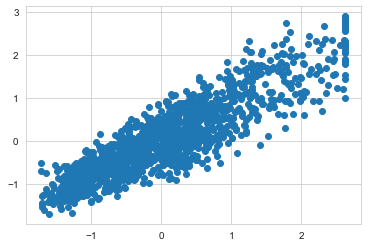

In [148]:
plt.scatter(y_test['AgentBonus'], y_pred)

In [149]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (0.14) * Age + (0.14) * CustTenure + (0.0) * Channel + (-0.0) * Occupation + (0.0) * EducationField + (0.01) * Gender + (-0.01) * ExistingProdType + (0.09) * Designation + (0.02) * NumberOfPolicy + (0.0) * MaritalStatus + (0.12) * MonthlyIncome + (0.01) * Complaint + (0.08) * ExistingPolicyTenure + (0.61) * SumAssured + (-0.0) * Zone + (-0.01) * PaymentMethod + (-0.01) * LastMonthCalls + (0.01) * CustCareScore + 

In [ ]:
#Intepretation Through Linear Regression model
#1. Through the model , we can say that Age , complaints , Existing Policy tenure ,
# Existing Prod Type , Education Field , Martial Status should be a decisive factor 
# in deciding the agent bonus.
#2. There are some negative coefficients as well , like PaymemtMethod , Sum assured , Gender and Zone which means these varaibles
# can be neglected while deciding AgentBonus.
# 3. Agents with highest complaints are low performing agents and should be given upskill programs.
# 4. Last month calls , Education field , Designation are secondary varialbes for deciding Bonuses. 

In [ ]:
# Buidling Random Forest Regressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
regressor = RandomForestRegressor(n_estimators=10 , random_state=0)
regressor.fit(X_train, y_train)

<ipython-input-151-a74679251b5c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [152]:
y_pred_rf = regressor.predict(X_test)
y_pred_rf

array([ 0.46600284,  2.20600249, -0.81800833, ..., -0.88580482,
       -1.0766803 ,  0.5759053 ])

In [222]:
from sklearn.metrics import r2_score
Rf_r2 = r2_score(y_test , y_pred_rf)
Rf_r2

0.8375532324129309

In [223]:
# Coefficient of Determinant for train data
Rf_score_train = regressor.score(X_train, y_train)
Rf_score_train

0.9710532255324619

In [224]:
# Coefficient of Determinant for test data
Rf_score_test = regression_model.score(X_test, y_test)
Rf_score_test

0.7893817305415488

In [238]:
index=['Score']
data = pd.DataFrame({'RF_Train':[Rf_score_train],
        'RF_Test':[Rf_score_test]},index=index)
round(data,3)

,RF_Train,RF_Test
Score,0.971,0.789


In [ ]:
# Checking Features which hold importance in deciding the Agent Bonus.

In [154]:
print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                           Imp
SumAssured            0.732008
Age                   0.080762
CustTenure            0.060050
MonthlyIncome         0.037789
Designation           0.021688
ExistingPolicyTenure  0.013196
LastMonthCalls        0.012001
NumberOfPolicy        0.006980
CustCareScore         0.006520
Channel               0.004157
ExistingProdType      0.003744
EducationField        0.003568
MaritalStatus         0.003358
Occupation            0.003153
PaymentMethod         0.003100
Zone                  0.002946
Gender                0.002822
Complaint             0.002157


In [ ]:
# Building SVM regressor

In [155]:
from sklearn.svm import SVR

In [156]:
SV_regressor = SVR(kernel='rbf')
SV_regressor.fit(X_train, y_train)

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [212]:
y_pred_sv = SV_regressor.predict(X_test)
y_pred_sv

array([ 0.5221504 ,  2.01697312, -1.13760476, ..., -0.67334424,
       -0.68657324,  0.73032776])

In [213]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred_sv)

0.7896618974091997

In [225]:
SV_train = SV_regressor.score(X_test, y_test)
SV_train

0.7896618974091997

In [226]:
SV_test = SV_regressor.score(X_train, y_train)
SV_test

0.8954194242448492

In [239]:
index=['Score']
data = pd.DataFrame({'SV_Train':[SV_train],
        'SV_Test':[SV_test]},index=index)
round(data,3)

,SV_Train,SV_Test
Score,0.79,0.895


In [ ]:
# Ensemble techniques

In [ ]:
# Using Bagging and taking linear regression , random forest as base estimator

In [160]:
from sklearn.ensemble import BaggingRegressor

In [173]:
Bag_model = BaggingRegressor(base_estimator= regression_model)
Bag_model.fit(X_train,y_train)

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingRegressor(base_estimator=LinearRegression())

In [174]:
y_pred_bag = Bag_model.predict(X_test)
y_pred_bag

array([ 0.48578827,  1.99997447, -0.73334973, ..., -0.89483019,
       -1.04820942,  0.89407884])

In [240]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test , y_pred_bag)
r2_lr

0.7815948449073118

In [176]:
Bag_model1 = BaggingRegressor(base_estimator= regressor)
Bag_model1.fit(X_train,y_train)

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=10,
                                                      random_state=0))

In [177]:
y_pred_bag1 = Bag_model1.predict(X_test)
y_pred_bag1

array([ 0.53379933,  2.36402132, -0.74325551, ..., -0.93276917,
       -1.04538055,  0.67140193])

In [241]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test , y_pred_bag1)
r2_rf

0.8468099026624094

In [242]:
index=['R2_Score']
data = pd.DataFrame({'LR':[r2_lr],
        'RF':[r2_rf]},index=index)
round(data,3)

,LR,RF
R2_Score,0.782,0.847


In [ ]:
# Using Bagging and taking linear regression , random forest as base estimator

In [179]:
from sklearn.ensemble import AdaBoostRegressor

In [180]:
Boost_model = AdaBoostRegressor(base_estimator= regression_model)
Boost_model.fit(X_train,y_train)

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(base_estimator=LinearRegression())

In [182]:
y_pred_boost = Boost_model.predict(X_test)
y_pred_boost

array([ 0.52580485,  2.13573195, -0.60343195, ..., -0.9085796 ,
       -0.97421812,  1.01487794])

In [183]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred_boost)

0.7815948449073118

In [185]:
Boost_model1 = AdaBoostRegressor(base_estimator= regressor)
Boost_model1.fit(X_train,y_train)

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=10,
                                                       random_state=0))

In [186]:
y_pred_boost1 = Boost_model1.predict(X_test)
y_pred_boost1

array([ 0.53976189,  2.27556567, -0.81292911, ..., -0.8881604 ,
       -1.11341261,  0.67498682])

In [187]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred_boost1)

0.8473343191201838

In [ ]:
# As part of model tuning, Ridge and lasso regression are good options as it will reduce multicolinearity 
# and it will not take those features into account which have less importance.

In [188]:
from sklearn.linear_model import Ridge

In [189]:
r_model = Ridge()
r_model.fit(X_train , y_train)

Ridge()

In [190]:
y_pred_r = r_model.predict(X_test)
y_pred_r

array([[ 0.46924808],
       [ 1.97042061],
       [-0.72212874],
       ...,
       [-0.89929704],
       [-1.05101433],
       [ 0.86634265]])

In [191]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred_r)

0.7893899153598954

In [192]:
from sklearn.linear_model import Lasso

In [206]:
L_model = Lasso()
L_model.fit(X_train , y_train)

Lasso()

In [207]:
y_pred_l = L_model.predict(X_test)
y_pred_l

array([1.12285515e-16, 1.12285515e-16, 1.12285515e-16, ...,
       1.12285515e-16, 1.12285515e-16, 1.12285515e-16])

In [209]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred_l)

0.0

In [229]:
index=['Score']
data = pd.DataFrame({'Linear Regression Train':[LR_score_train],
        'Linear Regression Test':[LR_score_test],
       'Random Forest Train':[Rf_score_train],
        'Random Forest Test':[Rf_score_test],
       'SVM Train':[SV_train],
        'SVM Test':[SV_test]},index=index)
round(data,3)

,Linear Regression Train,Linear Regression Test,Random Forest Train,Random Forest Test,SVM Train,SVM Test
Score,0.801,0.789,0.971,0.789,0.79,0.895
